##### Metrics for Classification Sticth Fabric Detection
- Accuracy (Most Important)
- F1 Score 
- Precision
- Recall
- Time Complexity (Important)
- ROC AUC (Optional)
- Kappa (Optional)
- MCC (Optional)

### Calculation Metrics

- **Confusion Matrix**: Defined as TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)

- **Accuracy**: `(TP + TN) / (TP + TN + FN + FP)`

- **Error Rate**: `(FP + FN) / (TP + TN + FN + FP)`

- **Sensitivity (Recall)**: `TP / (TP + FN)`

- **Specificity**: `TN / (TN + FP)`

- **Balanced Accuracy**: `(Sensitivity + Specificity) / 2`

- **Precision**: `TP / (TP + FP)`

- **F1-Score**: `2 * (Precision * Recall) / (Precision + Recall)`

- **Macro**: A type of averaging method for multiclass classification

- **Weighted**: A type of averaging method that takes class imbalance into account

- **ROC AUC**: Area Under the Receiver Operating Characteristic Curve

- **PR AUC**: Area Under the Precision-Recall Curve

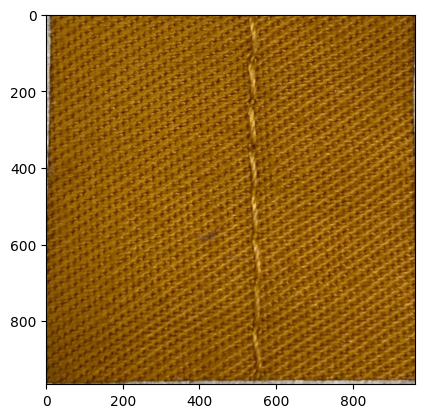

In [907]:
import cv2 												# OpenCV (Requirement For Image Processing)
import numpy as np									# Numpy (Requirement For Special Math Operations Like Matrix Multiplication)
import matplotlib.pyplot as plt					# Matplotlib (Requirement For Plotting Graphs Or Evaluate The Result)

path = 'dataset/train/straight/straight31.jpg' 		# Path to the image

image = cv2.imread(path)							# Load the image based on the path

if image is None:
    print("Failed to load image")   
else:
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)			# Convert the image to RGB (OpenCV uses BGR)

	plt.imshow(image)									# Display the image

The resolution of the image is 964x965 pixels.


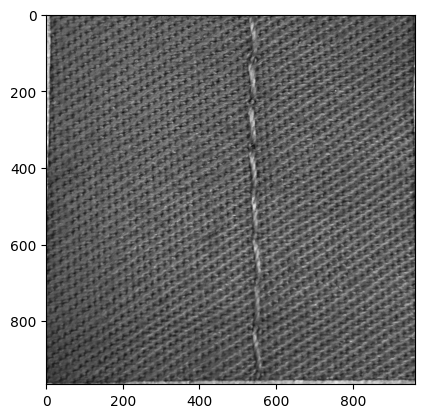

In [908]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)          # Load image in grayscale

if image is None:
    print("Failed to load image")   
else:
    height, width = image.shape[:2] # Get the image resolution (height, width) In Pixels
    print(f'The resolution of the image is {width}x{height} pixels.')
    plt.imshow(image, cmap='gray')  # Display the image in grayscale cmap is use because matplotlib uses RGB and OpenCV uses BGR

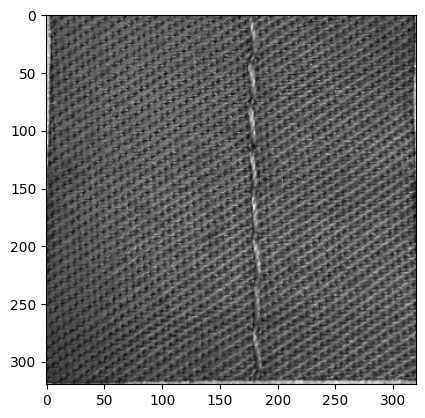

In [909]:
# Resize the image into 320x320 pixels
image = cv2.resize(image, (320, 320))

# Display the resized image
plt.imshow(image, cmap='gray')

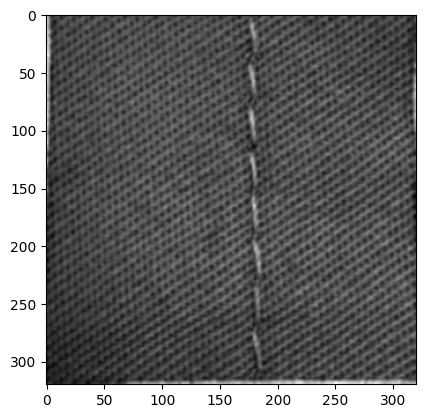

In [910]:
image = cv2.GaussianBlur(image, (5, 5), 0) # Apply Gaussian Blur to the image with a kernel size of 5x5 and sigma of 0

# Display the image after applying Gaussian Blur
plt.imshow(image, cmap='gray')

In [911]:
# # Make the image blurrier in x 0-150 and 200-320
# image[:, 0:100] = cv2.GaussianBlur(image[:, 0:100], (15, 15), 0) 		# image[x, y]	GaussianBlur(Position, KernelSize, Sigma) 
# image[:, 200:320] = cv2.GaussianBlur(image[:, 200:320], (15, 15), 0)  # image[x, y]	GaussianBlur(Position, KernelSize, Sigma)

# # Display the image
# plt.imshow(image, cmap='gray')

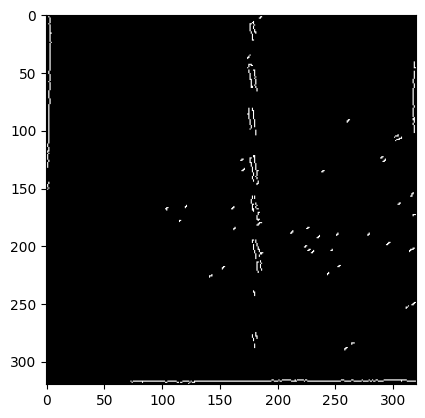

In [912]:
# Detect edges with Canny Opencv
image = cv2.Canny(image, 150, 200)	# Canny(image, threshold1, threshold2)
# 150 is the lower threshold and 200 is the upper threshold
# threshold is a value for segmentation, it is used to separate an object from the blurry background
plt.imshow(image, cmap='gray')

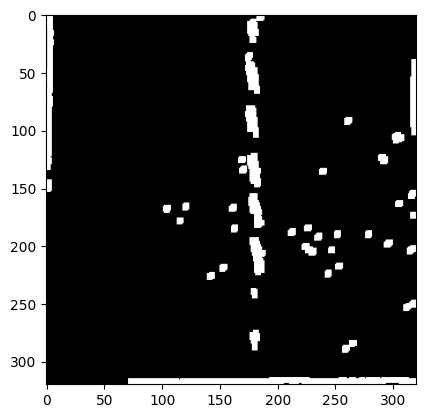

In [913]:
image = cv2.dilate(image, None, iterations=2) 	# Dilate (operation that "grows" or "thickens" objects in a binary image.)
# Fill the holes in the images dilate(image, None=DefaultOperatin, iterations = 2(Thick the Holes Twice))
plt.imshow(image, cmap='gray')

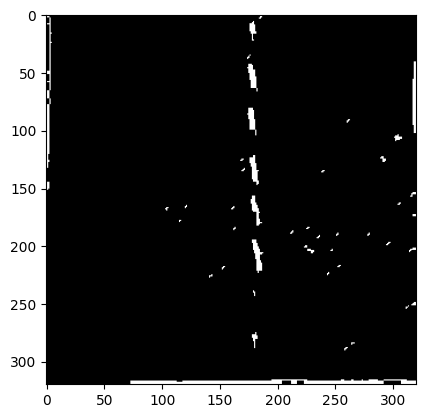

In [914]:
image = cv2.erode(image, None, iterations=2)	# Erode the image (Menghilangkan Pori2 Pada Gambar)

# Display the image after applying Erosion
plt.imshow(image, cmap='gray')

Number of lines: 7


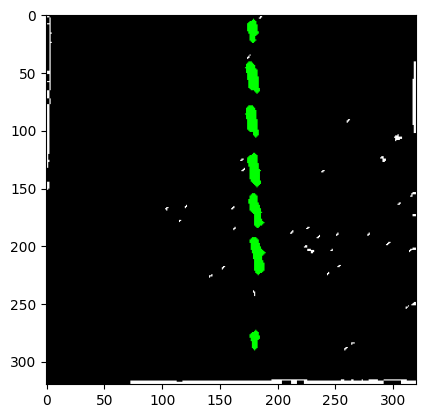

In [915]:
_, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY) # Requirement for findContours
# threshold(image, thresholdValue(WhiteColorValue(0-255)), maxValueThreshold, thresholdType)

# Count White Lines Of The Images
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # Find the contours
# findContours(image, mode, method) mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE

# Filter out small contours and count the remaining ones
lines = [c for c in contours if cv2.boundingRect(c)[3] > 10 and cv2.boundingRect(c)[3] < 40] # Filter out small contours (noise)
# Where boundingRect(c) return in the format (x, y, w, h) where can be called with 0 = x, 1 = y, 2 = w, 3 = h
number_of_lines = len(lines) # Count the remaining contours

image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) 		# Convert the image to RGB (OpenCV uses BGR)

cv2.drawContours(image, lines, -1, (0, 255, 0), 3) 	# Draw the contours

plt.imshow(image) 
print(f'Number of lines: {number_of_lines}')

In [916]:
# # Apply thresholding
# _, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

# plt.imshow(image, cmap='gray')

In [917]:
# # Create an empty mask
# mask = np.zeros_like(image)

# # Draw the contours on the mask
# cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# plt.imshow(mask, cmap='gray')

In [918]:
# np.set_printoptions(threshold=np.inf)

# print(image.shape) 
# print(image)

# # The arguments are: image, start_point, end_point, color(BGR), thickness
# image = cv2.line(image, (0, 240), (10, 200), (0, 255, 0), 5)

# plt.imshow(image)

# # The start point is the top-left corner of the image
# start_point = (0, 0)

# # The end point is the bottom-right corner of the image
# end_point = (width - 1, height - 1)

# print(f'The start point is {start_point} and the end point is {end_point}.')

In [919]:
# # Detect corners using the Harris method
# dst = cv2.cornerHarris(image, 3, 5, 0.1)
# plt.imshow(dst, cmap='gray')

In [920]:
# # Apply a filter to extract features. Here, we use Sobel filter for edge detection
# sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel Edge Detection on the X axis
# sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Edge Detection on the Y axis

In [921]:
# # Combine the two edges
# sobel_combined = cv2.bitwise_or(sobelx, sobely)
# plt.imshow('Feature Map', sobel_combined)

In [922]:
# image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,13,5)

# plt.imshow(image, cmap='gray')

In [923]:
# # Edge detection
# image = cv2.Canny(image, 90, 100)

# # # Zero out the part of the image below a certain y-coordinate
# # y_threshold = int(image.shape[0] * 0.5)  # Change this to set the threshold
# # image[y_threshold:, :] = 0

# plt.imshow(image, cmap='gray')

In [924]:
# # Reverse the color of the image
# image = cv2.bitwise_not(image)

# plt.imshow(image, cmap='gray')

In [925]:
# image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,13,5)
# # Make the smaller image can be detected when the image in canny for example detect text book

# plt.imshow(image, cmap='gray')  # Display the image